In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
data = pd.read_csv("C:/Users/Hemalatha P/Downloads/bank-full.csv", delimiter = ';')
print(data.shape)
data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [73]:
# Checking for null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

no     39922
yes     5289
Name: y, dtype: int64


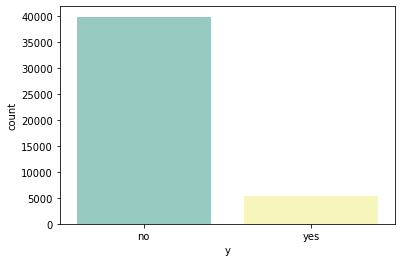

In [74]:
sns.countplot(x = 'y' , data = data , palette = 'Set3')
print(data['y'].value_counts())

In [75]:
n = 39922
y = 5289 
Total_yes = y / (y+n) 
Total_yes

0.11698480458295547

### 11.6% of the total have registered.

In [76]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Text(0, 0.5, 'Frequency of subscribtion')

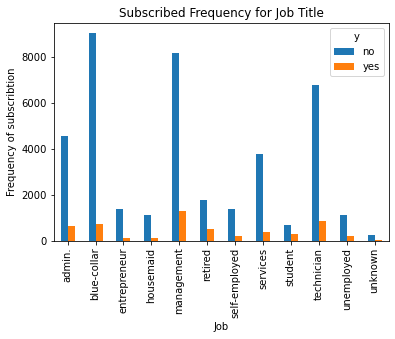

In [77]:
pd.crosstab(data.job,data.y).plot(kind='bar' )
plt.title('Subscribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of subscribtion')

Text(0, 0.5, 'Frequency of subscribtion')

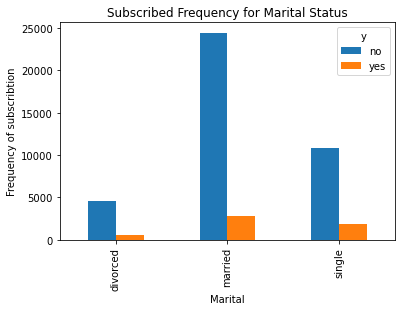

In [78]:
pd.crosstab(data.marital,data.y).plot(kind='bar')
plt.title('Subscribed Frequency for Marital Status')
plt.xlabel('Marital')
plt.ylabel('Frequency of subscribtion')

Text(0, 0.5, 'Frequency of subscribtion')

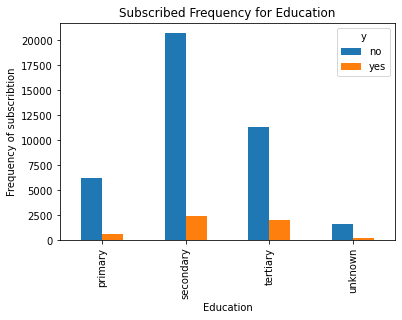

In [79]:
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Subscribed Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of subscribtion')

yes    25130
no     20081
Name: housing, dtype: int64


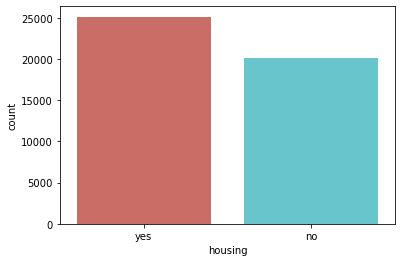

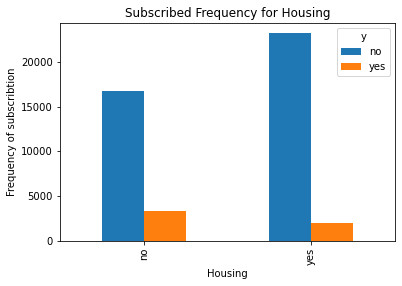

In [80]:
sns.countplot(x='housing',data = data , palette ='hls')
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('Subscribed Frequency for Housing')
plt.xlabel('Housing')
plt.ylabel('Frequency of subscribtion')
print(data['housing'].value_counts())

no     37967
yes     7244
Name: loan, dtype: int64


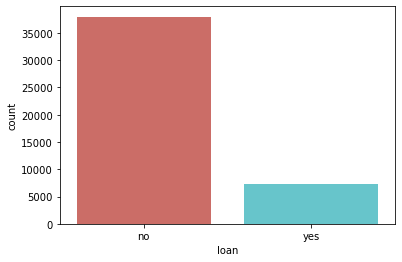

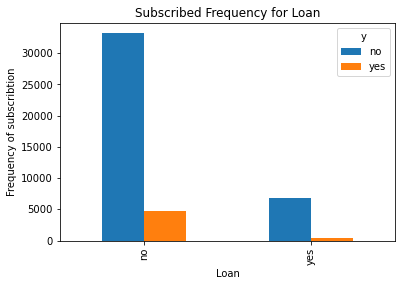

In [81]:
sns.countplot(x='loan',data = data , palette ='hls')
pd.crosstab(data.loan,data.y).plot(kind='bar')
plt.title('Subscribed Frequency for Loan')
plt.xlabel('Loan')
plt.ylabel('Frequency of subscribtion')
print(data['loan'].value_counts())

Text(0, 0.5, 'Frequency of subscribtion')

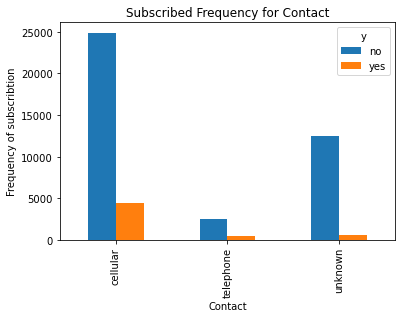

In [82]:
pd.crosstab(data.contact,data.y).plot(kind='bar')
plt.title('Subscribed Frequency for Contact')
plt.xlabel('Contact')
plt.ylabel('Frequency of subscribtion')


Text(0, 0.5, 'Frequency of subscribtion')

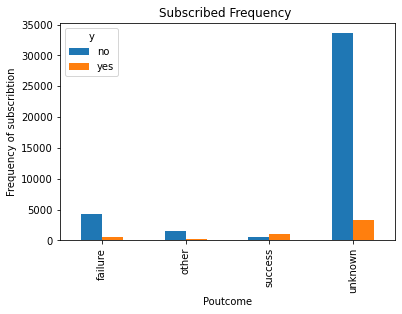

In [83]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Subscribed Frequency ')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of subscribtion')

Text(0.5, 1.0, 'Frequency of age')

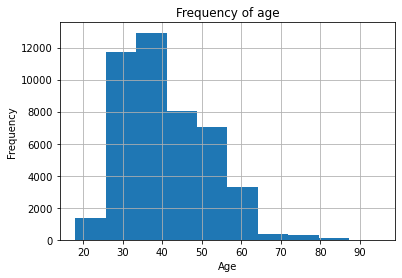

In [84]:
data.age.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Frequency of age")

Most customers age ranges between 20 and 60 years old

Text(0, 0.5, 'Frequency of subscribtion')

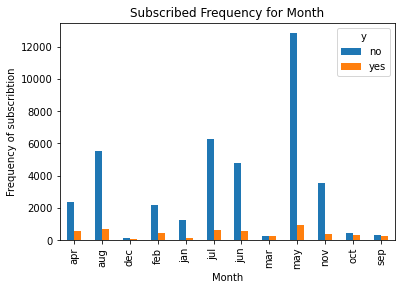

In [85]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Subscribed Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of subscribtion')

Converting all categorical columns to numerical code

In [86]:
data['job'] = data['job'].astype('category')
data['job'] = data['job'].cat.codes

data['marital'] = data['marital'].astype('category')
data['marital'] = data['marital'].cat.codes

data['default'] = data['default'].astype('category')
data['default'] = data['default'].cat.codes

data['education'] = data['education'].astype('category')
data['education'] = data['education'].cat.codes

data['housing'] = data['housing'].astype('category')
data['housing'] = data['housing'].cat.codes

data['loan'] = data['loan'].astype('category')
data['loan'] = data['loan'].cat.codes

data['contact'] = data['contact'].astype('category')
data['contact'] = data['contact'].cat.codes

data['month'] = data['month'].astype('category')
data['month'] = data['month'].cat.codes

data['poutcome'] = data['poutcome'].astype('category')
data['poutcome'] = data['poutcome'].cat.codes

data['y'] = data['y'].astype('category')
data['y'] = data['y'].cat.codes





In [87]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


### Logistic Regression  Model

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
X = data.iloc[:,0:16]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [90]:
y = data.iloc[:,16]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int8

In [91]:
model = LogisticRegression()
model.fit(X,y)

C:\Users\Hemalatha P\Documents\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
#Prediction for X Dataset
y_pred = model.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [93]:
data['Y_pred'] = y_pred
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


In [94]:
pred_df = pd.DataFrame({'Actual' : y  , 'Predicted' : y_pred})
pred_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [105]:
# Confusion matrix for checking model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [101]:
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39279   643]
 [ 4438   851]]


In [102]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [104]:
# ACCURACY
print("Accuracy :" , accuracy_score(y,y_pred))

Accuracy : 0.8876158457012674


### ROC Curve

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [107]:
fpr , tpr , threshold = metrics.roc_curve(y,y_pred)

Text(0, 0.5, 'True Positive Rate')

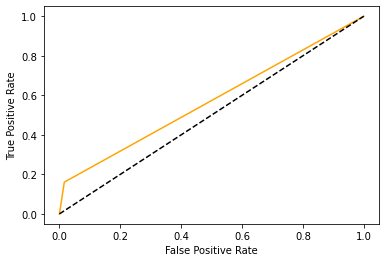

In [117]:
import matplotlib.pyplot as plt
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color='orange', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [118]:
auc

0.5723967867991099

### Conclusion
The LogisticRegression model has an accuracy of 89% approx.